인삼의 데이터 분석 모델입니다. 각기 다른 방법으로 주어진 데이터셋을 시각화함으로써 더 빠른 분석과 어떤 변수가 가장 큰 영향을 미치는지 빠르게 파악할 수 있습니다. 논문에서 유의미하다고 밝혀진 변인들을 파악하고, 혹시 다른 변인들도 유의미하다고 생각되면 추가로 작성합니다.



In [66]:
from google.colab import drive
drive.mount('/content/gdrive') #Google Drive로 경로 지정

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf

from sklearn.decomposition import PCA

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [67]:
total=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dataset/인삼 국가별 무기성분 분석표(1차)_normalized.csv')
result=pd.DataFrame.to_numpy(total)
df_result=pd.DataFrame(result)
target=df_result[0]
data=df_result.iloc[:,1:]


total2=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dataset/인삼 국가별 무기성분 분석표(2차)_normalized.csv')
result2=pd.DataFrame.to_numpy(total2)
df_result2=pd.DataFrame(result2)
target2=df_result2[0]
data2=df_result2.iloc[:,1:]

In [68]:
df_result[0].unique()

array(['Korea', 'China', 'America'], dtype=object)

Principal Component Analysis


ValueError: ignored

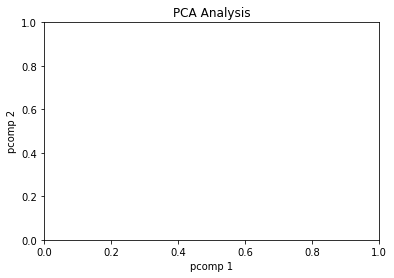

In [72]:
#Principal Component Analysis
print('Principal Component Analysis')

pca=PCA(n_components=2)

pca.fit(data)
data_pca=pca.transform(data)

plt.figure()
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.title("PCA Analysis")
plt.scatter(data_pca[:,0], data_pca[:,1], c=data_pca[0])
plt.show()



In [ ]:
pca_columns=['pca_component_1', 'pca_component_2']
dataDF_pca=pd.DataFrame(data_pca, columns=pca_columns)
dataDF_pca[0]=target

markers=['^', 's', 'o']

for i in range(len(markers)):
    x_axis_data=dataDF_pca[dataDF_pca[0]=='Korea']['pca_component_1']
    x_axis_data=dataDF_pca[dataDF_pca[0]=='China']['pca_component_1']
    x_axis_data=dataDF_pca[dataDF_pca[0]=='America']['pca_component_1']
    y_axis_data=dataDF_pca[dataDF_pca[0]=='Korea']['pca_component_2'] 
    y_axis_data=dataDF_pca[dataDF_pca[0]=='China']['pca_component_2'] 
    y_axis_data=dataDF_pca[dataDF_pca[0]=='America']['pca_component_2'] 
    plt.scatter(x_axis_data, y_axis_data, marker=markers[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()